In [ ]:
from graid.data.ImageLoader import (
    Bdd100kDataset,
    NuImagesDataset,
    WaymoDataset,
)
from graid.utilities.common import (
    project_root_dir,
    yolo_bdd_transform,
    yolo_nuscene_transform,
    yolo_waymo_transform,
)

bdd = Bdd100kDataset(
    split="train",
    transform=lambda i, l: yolo_bdd_transform(i, l, new_shape=(768, 1280)),
    use_original_categories=False,
    use_extended_annotations=False,
    use_time_filtered=True,
    rebuild=True,
)
# nuimages = NuImagesDataset(
#     split="train",
#     size="all",
#     transform=lambda i, l: yolo_nuscene_transform(i, l, new_shape=(896, 1600)),
    
# )
# waymo = WaymoDataset(
#     transform=lambda i, l: yolo_waymo_transform(i, l, (1280, 1920))
# )
# waymo_path = project_root_dir() / "data/waymo_validation_interesting_filtered"

In [ ]:
import pickle

for f in waymo_path.glob("*"):
    print(f)
    img_data = pickle.load(open(f, "rb"))
    print(img_data.keys())
    break
    

/work/ke/research/scenic-reasoning/data/waymo_training_interesting_filtered/88.pkl
dict_keys(['name', 'path', 'image', 'labels', 'attributes', 'timestamp'])


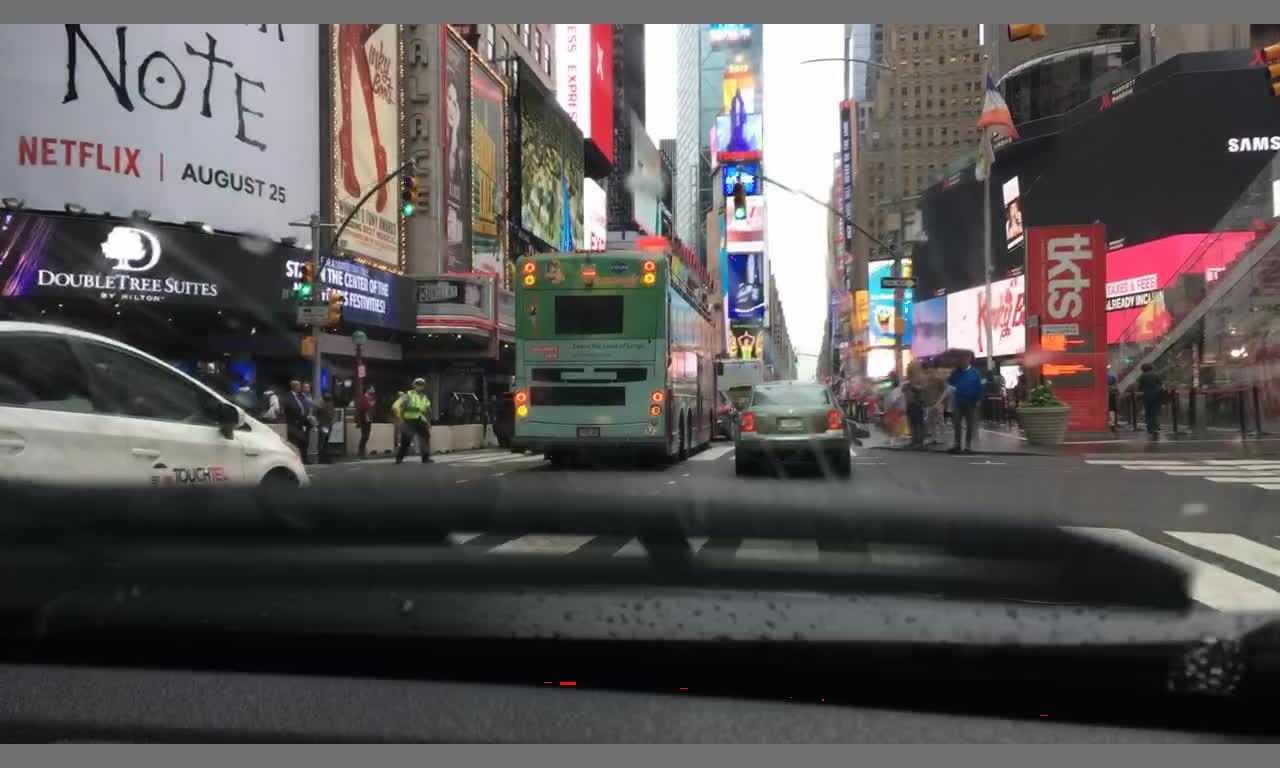

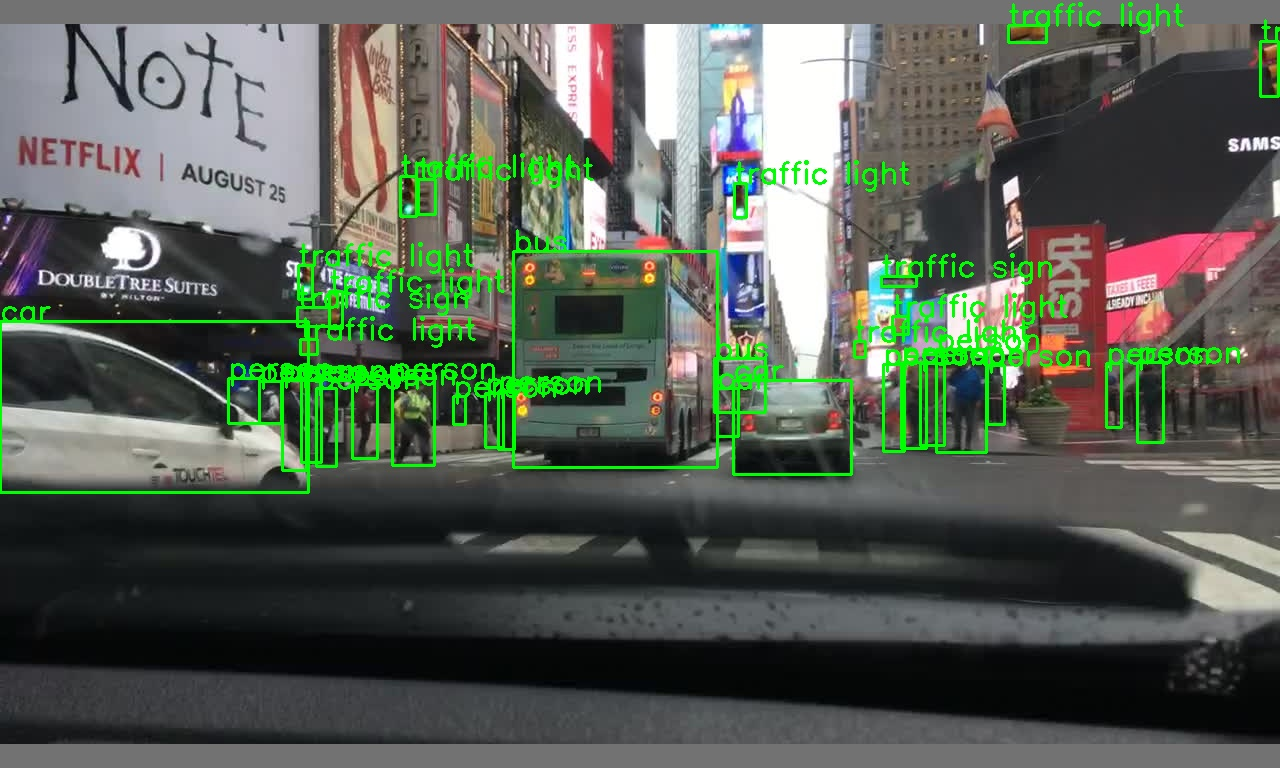

In [11]:
from IPython.display import Image, display
from IPython.display import clear_output
import cv2
import numpy as np
from PIL import Image as PILImage
import torch
import io
import torchvision.transforms as transforms


i = 700
while True:
    bdd_image = bdd[i]["image"]
    nuimages_image = nuimages[i]["path"]
    bdd_label = bdd[i]["labels"]
    nuimages_label = nuimages[i]["labels"]
    waymo_image = waymo[i]["image"]
    waymo_label = waymo[i]["labels"]
    # waymo_item = pickle.load(open(str(waymo_path / f"{i}.pkl"), "rb"))
    # waymo_image = PILImage.open(io.BytesIO(waymo_item["image"]))
    # waymo_label = waymo_item["labels"]
    
    i -= 1
    user_input = input("Next image? (y/n): ")
    if user_input.lower() == "n":
        break

    # Convert tensor to PIL image and display
    bdd_pil_image = transforms.ToPILImage()(bdd_image)
    # Convert to negative by inverting the image
    bdd_pil_image = PILImage.fromarray(255 - np.array(bdd_pil_image))
    img_byte_arr = io.BytesIO()
    bdd_pil_image.save(img_byte_arr, format='JPEG')
    display(Image(data=img_byte_arr.getvalue()))
    # Convert tensor to numpy array and then to cv2 format
    bdd_im_copy = bdd_image.permute(1, 2, 0).numpy().astype(np.uint8)
    bdd_im_copy = cv2.cvtColor(bdd_im_copy, cv2.COLOR_RGB2BGR)
    # draw the rectangles using cv2
    for box in bdd_label:
        bbox = box.as_xyxy()[0].tolist()
        cv2.rectangle(bdd_im_copy, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), (0, 255, 0), 2)
        cv2.putText(bdd_im_copy, box.label, (int(bbox[0]), int(bbox[1])), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    bdd_im_copy = cv2.imencode('.jpg', bdd_im_copy)[1].tobytes()
    display(Image(bdd_im_copy))

    # display(Image(filename=nuimages_image))
    # nuimages_im_copy = cv2.imread(nuimages_image)
    # # draw the rectangles using cv2
    # for box in nuimages_label:
    #     bbox = box.as_xyxy()[0].tolist()
    #     cv2.rectangle(nuimages_im_copy, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), (0, 255, 0), 2)
    #     cv2.putText(nuimages_im_copy, box.label, (int(bbox[0]), int(bbox[1])), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    # nuimages_im_copy = cv2.imencode('.jpg', nuimages_im_copy)[1].tobytes()
    # display(Image(nuimages_im_copy))

    # display(waymo_image)
    # waymo_im_copy = waymo_image.copy()
    # # draw the rectangles using cv2
    # for box in waymo_label:
    #     bbox = box["bbox"]
    #     waymo_im_copy = np.array(waymo_im_copy).astype(np.uint8)
    #     waymo_im_copy = waymo_im_copy.copy()
    #     cv2.rectangle(waymo_im_copy, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), (0, 255, 0), 2)
    #     cv2.putText(waymo_im_copy, str(box["type"]), (int(bbox[0]), int(bbox[1])), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    # waymo_im_copy = cv2.cvtColor(waymo_im_copy, cv2.COLOR_BGR2RGB)
    # waymo_im_copy = cv2.imencode('.jpg', waymo_im_copy)[1].tobytes()
    # display(Image(waymo_im_copy))

    # Convert tensor to PIL Image and display
    # waymo_pil_img = PILImage.fromarray(waymo_image.permute(1, 2, 0).numpy().astype(np.uint8))
    # display(waymo_pil_img)
    # waymo_im_copy = waymo_pil_img.copy()
    # for box in waymo_label:
    #     bbox = box.as_xyxy()[0].tolist()
    #     waymo_im_copy = np.array(waymo_im_copy).astype(np.uint8)
    #     waymo_im_copy = waymo_im_copy.copy()
    #     cv2.rectangle(waymo_im_copy, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), (0, 255, 0), 2)
    #     cv2.putText(waymo_im_copy, str(box.label), (int(bbox[0]), int(bbox[1])), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    # waymo_im_copy = cv2.cvtColor(waymo_im_copy, cv2.COLOR_BGR2RGB)
    # waymo_im_copy = cv2.imencode('.jpg', waymo_im_copy)[1].tobytes()
    # display(Image(waymo_im_copy))

    clear_output(wait=True)